In [1]:
'''
1. Istogramma che mostra il trend del numero di corsi pubblicati negli anni.
2. Grafico a linee che mostra il trend cumulativo del numero di corsi per materia pubblicati negli anni.
3. Grafico a linee che mostra il trend del numero di iscritti annuali per materia negli anni in milioni.
4. Grafico a linee che mostra il trend dei guadagni annuali per materia negli anni in milioni.
5. Matrice che mostra la correlazione tra le caratteristiche dei corsi ('Price', 'Subs', 'Reviews', 'Profit', 'Lectures').
'''
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('udemy_online_education_courses_dataset.csv')

df['published_timestamp'] = pd.to_datetime(df['published_timestamp'])
df['published_year'] = df['published_timestamp'].dt.year
df = df[(df['published_year'] >= 2012) & (df['published_year'] <= 2016)]

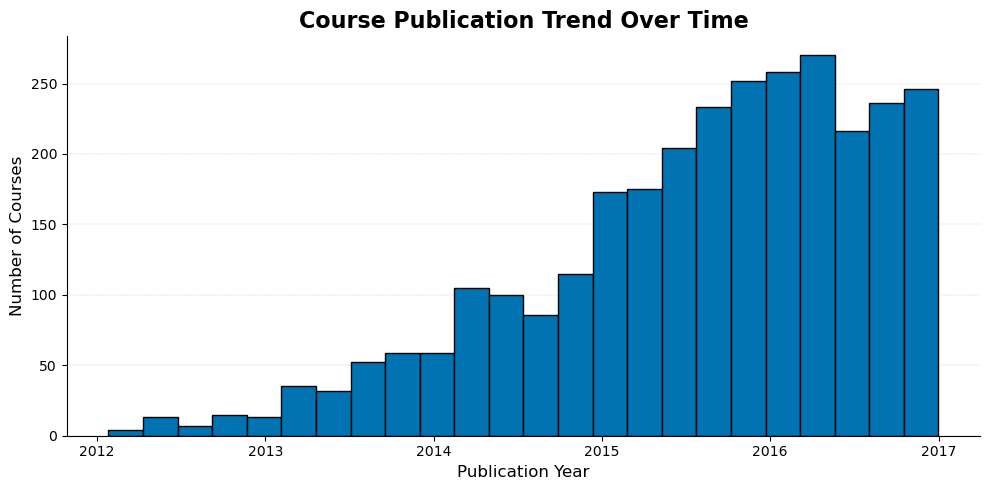

In [2]:
# 1. Trend del numero di corsi pubblicati negli anni - Istogramma
def histo_plot_course_publication_trend(data):
    
    plt.figure(figsize=(10, 5))
    
    color = sns.color_palette('colorblind', n_colors=1)[0]

    plt.grid(axis='y', linestyle='--', linewidth=0.3, alpha=0.7, zorder=0)
    
    # Istogramma
    sns.histplot(data['published_timestamp'], bins=24, kde=False, color=color, alpha=1, zorder=2)
    sns.despine()
    
    plt.title('Course Publication Trend Over Time', fontsize=16, fontweight='bold', loc='center')
    plt.xlabel('Publication Year', fontsize=12)
    plt.ylabel('Number of Courses', fontsize=12)

    plt.tight_layout()
    plt.savefig('Course Publication Trend Over Time.png')
    plt.show()

histo_plot_course_publication_trend(df)

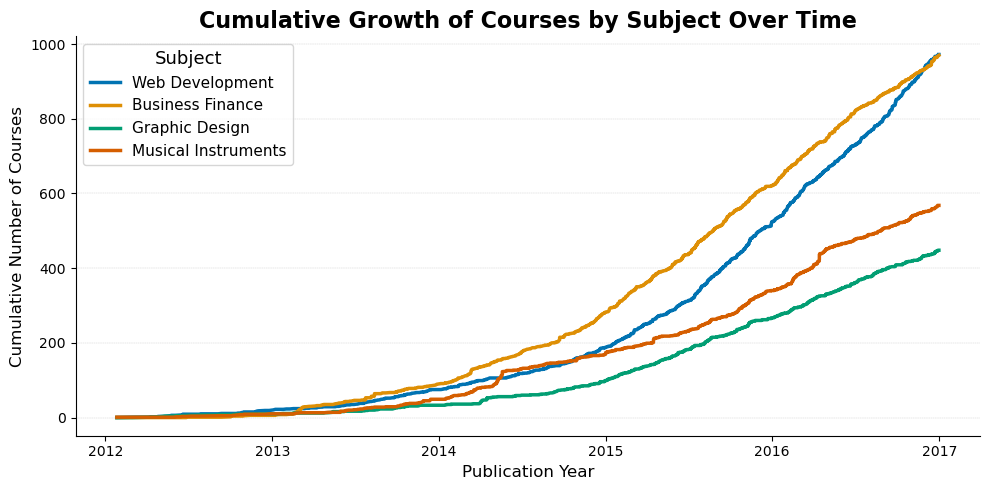

In [3]:
# 2. Trend cumulativo del numero di corsi per materia pubblicati negli anni - Grafico a linee
def line_plot_course_growth_by_subject(data):

    plt.figure(figsize=(10, 5))
    
    growth = data[['published_timestamp', 'subject']]
    growth = growth.sort_values('published_timestamp')
    
    dummies = pd.get_dummies(growth['subject'], prefix='cum')
    growth = pd.concat([growth, dummies], axis=1)
    
    for col in dummies.columns:
        growth[col] = growth[col].cumsum()
    
    growth_melt = growth.melt(
        id_vars='published_timestamp', 
        value_vars=dummies.columns, 
        var_name='Subject', 
        value_name='Cumulative Courses'
    )
    
    subject_mapping = {
        'cum_Business Finance': 'Business Finance',
        'cum_Graphic Design': 'Graphic Design',
        'cum_Musical Instruments': 'Musical Instruments',
        'cum_Web Development': 'Web Development'
    }
    growth_melt['Subject'] = growth_melt['Subject'].map(subject_mapping)

    subject_order = ['Web Development', 'Business Finance', 'Graphic Design', 'Musical Instruments']

    plt.grid(axis='y', linestyle='--', linewidth=0.3, alpha=0.7)
    
    # Grafico a linee
    sns.lineplot(data=growth_melt, x='published_timestamp', y='Cumulative Courses', hue='Subject', hue_order=subject_order, 
                 linewidth=2.5, palette='colorblind')
    sns.despine()
    
    plt.title('Cumulative Growth of Courses by Subject Over Time', fontsize=16, fontweight='bold', loc='center')
    plt.xlabel('Publication Year', fontsize=12)
    plt.ylabel('Cumulative Number of Courses', fontsize=12)
    plt.legend(title='Subject', title_fontsize=13, fontsize=11)
    
    plt.tight_layout()
    plt.savefig('Cumulative Growth of Courses by Subject Over Time.png')
    plt.show()

line_plot_course_growth_by_subject(df)

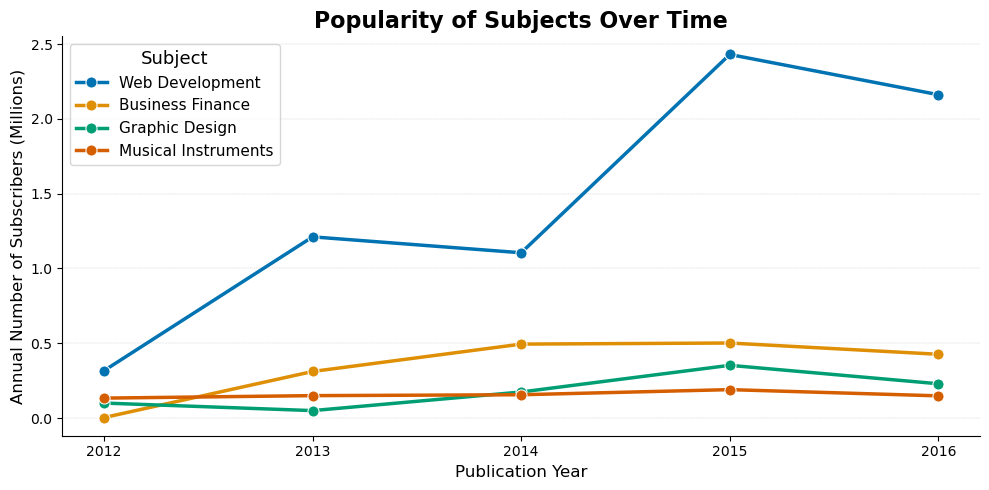

In [4]:
# 3. Trend del numero di iscritti annuali per materia negli anni in milioni - Grafico a linee
def line_plot_subject_popularity_over_time_by_subject(data):

    plt.figure(figsize=(10, 5))
    
    subject_trends = data.groupby(['published_year', 'subject'])['num_subscribers'].sum().reset_index()
    subject_trends['num_subscribers_millions'] = subject_trends['num_subscribers'] / 1_000_000

    subject_order = ['Web Development', 'Business Finance', 'Graphic Design', 'Musical Instruments']
  
    plt.grid(axis='y', linestyle='--', linewidth=0.3, alpha=0.7)
    
    # Grafico a linee
    sns.lineplot(data=subject_trends, x='published_year', y='num_subscribers_millions', hue='subject', hue_order=subject_order,
                 linewidth=2.5, palette='colorblind', marker='o', markersize=8)
    sns.despine()
    
    plt.title('Popularity of Subjects Over Time', fontsize=16, fontweight='bold', loc='center')
    plt.xlabel('Publication Year', fontsize=12)
    plt.xticks(ticks=subject_trends['published_year'].unique())
    plt.ylabel('Annual Number of Subscribers (Millions)', fontsize=12)
    plt.legend(title='Subject', title_fontsize=13, fontsize=11)

    plt.tight_layout()
    plt.savefig('Popularity of Subjects (in Millions) Over Time.png')
    plt.show()

line_plot_subject_popularity_over_time_by_subject(df)

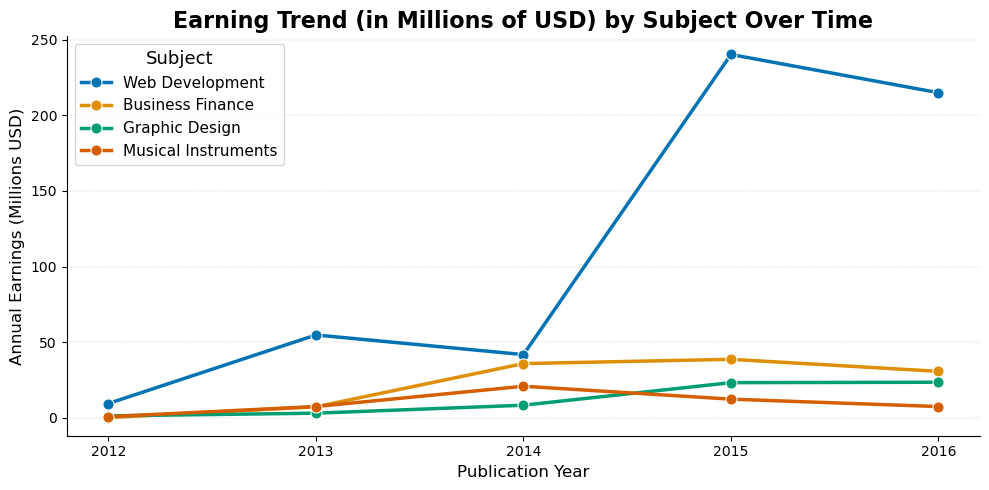

In [5]:
# 4. Trend dei guadagni annuali per materia negli anni in milioni - Grafico a linee
def line_plot_earning_trend_by_subject(data):

    plt.figure(figsize=(10, 5))
    
    paid_courses = data[data['is_paid'] == True].copy()
    paid_courses['revenue'] = paid_courses['price'] * paid_courses['num_subscribers']

    earning_by_year_subject = paid_courses.groupby(['published_year', 'subject'])['revenue'].sum().reset_index()
    earning_by_year_subject['revenue_millions'] = earning_by_year_subject['revenue'] / 1_000_000

    subject_order = ['Web Development', 'Business Finance', 'Graphic Design', 'Musical Instruments']

    plt.grid(axis='y', linestyle='--', linewidth=0.3, alpha=0.7)

    # Grafico a linee
    sns.lineplot(data=earning_by_year_subject, x='published_year', y='revenue_millions', hue='subject', hue_order=subject_order, 
                 linewidth=2.5, palette='colorblind', marker='o', markersize=8)
    sns.despine()
    
    plt.title('Earning Trend (in Millions of USD) by Subject Over Time', fontsize=16, fontweight='bold', loc='center')
    plt.xlabel('Publication Year', fontsize=12)
    plt.xticks(ticks=earning_by_year_subject['published_year'].unique())
    plt.ylabel('Annual Earnings (Millions USD)', fontsize=12)
    plt.legend(title='Subject', title_fontsize=13, fontsize=11)
    
    plt.tight_layout()
    plt.savefig('Earning Trend (in Millions USD) by Subject.png')
    plt.show()

line_plot_earning_trend_by_subject(df)

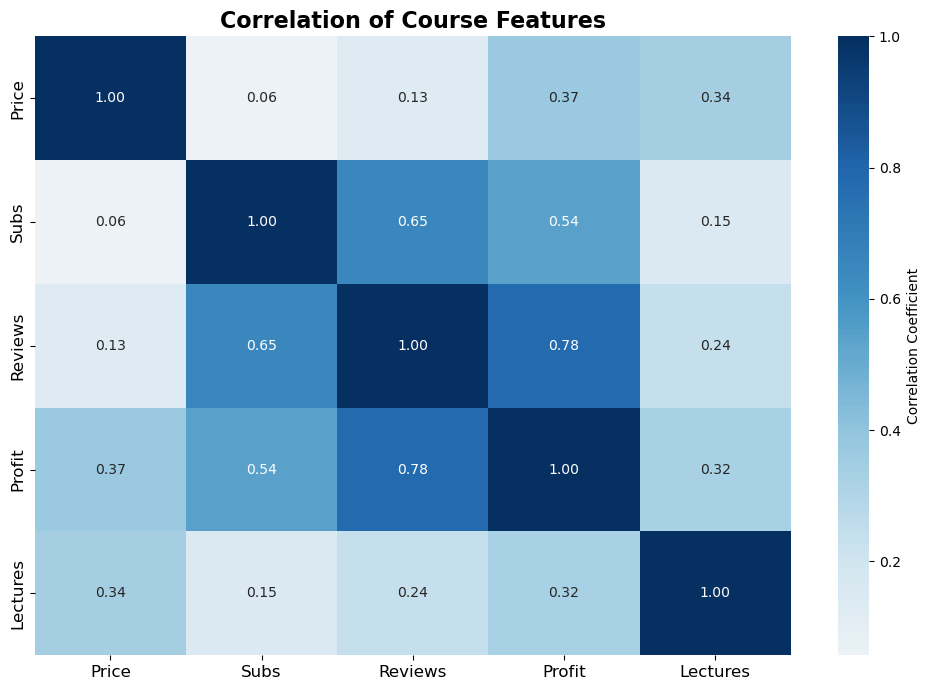

In [6]:
# 5. Correlazione tra le caratteristiche dei corsi - Matrice
def matrix_create_correlation(data):

    plt.figure(figsize=(10, 7))
    
    data = data.rename(columns={
        'price': 'Price',
        'num_subscribers': 'Subs',
        'num_reviews': 'Reviews',
        'profit': 'Profit',
        'num_lectures': 'Lectures'
    })
    
    data['Profit'] = data['Price'] * data['Subs']
    
    features = ['Price', 'Subs', 'Reviews', 'Profit', 'Lectures']

    # Matrice correlazioni
    correlation_matrix = data[features].corr()
    ax = sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='RdBu', center=0,
                     xticklabels=features, yticklabels=features, cbar=True, cbar_kws={'label': 'Correlation Coefficient'})
    
    plt.title("Correlation of Course Features", fontsize=16, fontweight='bold', loc='center')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    
    plt.tight_layout()
    plt.savefig('Correlation of Course Features.png')
    plt.show()

matrix_create_correlation(df)